# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [273]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [274]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [275]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [276]:
df_train.shape

(15223, 52)

In [277]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [278]:
df_test.shape

(14910, 52)

In [279]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [280]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [281]:
df = df_test.append(df_train).reset_index(drop=True)

In [282]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [284]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Ученая степень', 'Среднее специальное', 'Высшее', 'Среднее', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Логистика', 'Сборочные производства', 'Недвижимость', 'Подбор персонала', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Наука', 'Управляющая компания', 'Торговля', 'Другие сферы', 'Информационные технологии', 'Энергетика', 'Государственная служба', 'Транспорт', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Туризм', 'Информационные услуги', 'Страхование', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Строительство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [286]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [287]:
# пропуски данных есть. Разделим их на несколько категорий:


In [288]:
# 1) 'PREVIOUS_CARD_NUM_UTILIZED' - здесь все понятно, из условия следует, что если NaN, то заменить на 0
df_descr.T[50].values

array(['PREVIOUS_CARD_NUM_UTILIZED',
       'количество уже утилизированных карт ( если пусто - 0) '], dtype=object)

In [289]:
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value = 0)

In [290]:
#2) пропуски в категориям, относящимся к месту работы 
# посмотрим, есть ли зависимость между пропусками, например, если пропущен GEN_TITLE, пропущен ли при этом JOB_DIR
df[['GEN_TITLE','JOB_DIR', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'WORK_TIME']]

,GEN_TITLE,JOB_DIR,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,WORK_TIME
0,Специалист,Участие в основ. деятельности,Образование,Специалист,Государственная комп./учреж.,Без участия,39.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Специалист,Участие в основ. деятельности,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,156.0
3,Специалист,Участие в основ. деятельности,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,9.0
4,Специалист,Вспомогательный техперсонал,Образование,Специалист,Государственная комп./учреж.,Без участия,84.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Специалист,Участие в основ. деятельности,Сборочные производства,Специалист,Государственная комп./учреж.,Без участия,444.0
7,Специалист,Участие в основ. деятельности,Образование,Специалист,Государственная комп./учреж.,Без участия,144.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Рабочий,Вспомогательный техперсонал,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,36.0


In [291]:
#есть предположение, что пустые значения, связанные с работой могут быть связаны с тем, что человек не трудоустроен.
#посмотрим, какие значения принимает SOCSTATUS_WORK_FL
df['SOCSTATUS_WORK_FL'].unique()

array([1, 0], dtype=int64)

In [292]:
#а теперь посмотрим, какие значения имеет 'SOCSTATUS_WORK_FL' для незаполненных данных о работе
df[df['GEN_TITLE'].isnull()]['SOCSTATUS_WORK_FL'].describe() #describe использовали, чтобы сразу посмотреть на mean и max

count    2713.000000
mean        0.000369
std         0.019199
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SOCSTATUS_WORK_FL, dtype: float64

In [293]:
#видим, что mean очень маленкое число, а значит, что в большинстве случаев гипотеза о "безработности" подтвердилась
#посмотрим, что это за выпадающие записи, где значение 'SOCSTATUS_WORK_FL'!=0
#df[df['GEN_TITLE'].isnull()][df['SOCSTATUS_WORK_FL']!=0] - получили всего одну запись. Транспонируем для лучшей читаемости
df[df['GEN_TITLE'].isnull()][df['SOCSTATUS_WORK_FL']!=0].T

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,22873
AGREEMENT_RK,64469089
TARGET,0
AGE,24
SOCSTATUS_WORK_FL,1
SOCSTATUS_PENS_FL,0
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
EDUCATION,Среднее специальное
MARITAL_STATUS,Не состоял в браке


In [294]:
idx = df[df['GEN_TITLE'].isnull()][df['SOCSTATUS_WORK_FL']!=0].index

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [295]:
#Итог: для записей у которых SOCSTATUS_WORK_FL = 0 заменим значения NaN о работе в соответствующих столбцах на "безработный"
# запись с SOCSTATUS_WORK_FL = 0 удалим из выборки

In [296]:
df = df.drop(idx).reset_index(drop=True)

In [137]:
for i in ['GEN_TITLE','JOB_DIR', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
    df[i] = df[i].fillna(value = 'безработный')
df.WORK_TIME = df.WORK_TIME.fillna(value = 0)
df[['GEN_TITLE','JOB_DIR', 'GEN_INDUSTRY','WORK_TIME']].head(2)

,GEN_TITLE,JOB_DIR,GEN_INDUSTRY,WORK_TIME
0,Специалист,Участие в основ. деятельности,Образование,39.0
1,безработный,безработный,безработный,0.0


In [138]:
# 3) третья категория пропусков - TP_PROVINCE
# догадка - если человек не брал кредитов еще, то у него может быть поле последнего места (Province) выдачи нулевым
# проверим

In [139]:
df[df['TP_PROVINCE'].isnull()][['CREDIT']].count()

CREDIT    590
dtype: int64

In [140]:
# предположение не подтвердилось

In [141]:
# проверим, как часто у нас совпадают регион выдачи последнего кредита и регион проживания
df[df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE']][['TP_PROVINCE']].count()/30132

TP_PROVINCE    0.911821
dtype: float64

In [142]:
# проверим, как часто у нас совпадают регион выдачи последнего кредита и регион почтовый 
df[df['POSTAL_ADDRESS_PROVINCE'] == df['TP_PROVINCE']][['TP_PROVINCE']].count()/30132

TP_PROVINCE    0.911357
dtype: float64

In [143]:
# еще вариант - проверим, как часто у нас совпадают регион выдачи последнего кредита и регион регистрации
df[df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE']][['TP_PROVINCE']].count()/30132

TP_PROVINCE    0.911821
dtype: float64

In [144]:
# Поскольку однозначно предположить какое-то значение из уже существующих сложно, то можем либо отбросить эти строки, 
# либо же присвоить какие-то значения. Например, "Неизвестно". Выберем второй вариант 

In [145]:
df['TP_PROVINCE'] = df['TP_PROVINCE'].fillna(value='неизвестно')

In [146]:
#4) еще одна категория пропусков - это REGION_NM

In [147]:
# таких записи всего две. посмотрим на них
df[df['REGION_NM'].isnull()].T

,3099,17420
AGREEMENT_RK,61448233,61293307
TARGET,0,0
AGE,54,64
SOCSTATUS_WORK_FL,1,1
SOCSTATUS_PENS_FL,0,0
GENDER,1,1
CHILD_TOTAL,2,1
DEPENDANTS,0,0
EDUCATION,Среднее специальное,Среднее специальное
MARITAL_STATUS,Состою в браке,Разведен(а)


In [148]:
#посмотрим, какие значения принимает REGION_NM
df['REGION_NM'].unique()

array(['ВОСТОЧНО-СИБИРСКИЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2',
       'ДАЛЬНЕВОСТОЧНЫЙ', 'ПРИВОЛЖСКИЙ', 'УРАЛЬСКИЙ', 'ЗАПАДНО-СИБИРСКИЙ',
       'ПОВОЛЖСКИЙ', 'ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС', 'СЕВЕРО-ЗАПАДНЫЙ', nan], dtype=object)

In [149]:
# теперь посмотрим на записи, где значение REGION_NM = nan. таких записи всего две
df[df['REGION_NM'].isnull()].T#

,3099,17420
AGREEMENT_RK,61448233,61293307
TARGET,0,0
AGE,54,64
SOCSTATUS_WORK_FL,1,1
SOCSTATUS_PENS_FL,0,0
GENDER,1,1
CHILD_TOTAL,2,1
DEPENDANTS,0,0
EDUCATION,Среднее специальное,Среднее специальное
MARITAL_STATUS,Состою в браке,Разведен(а)


In [150]:
# видим, что параметры REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE и POSTAL_ADDRESS_PROVINCE 
# принимают значения = Новосибирская область/ Посмотрим, какие значения REGION_NM обычно соответствуют Новосибирской области
df[df['POSTAL_ADDRESS_PROVINCE']=='Новосибирская область']['REGION_NM'].unique()

array(['ЗАПАДНО-СИБИРСКИЙ', nan], dtype=object)

In [151]:
df[df['POSTAL_ADDRESS_PROVINCE']=='Новосибирская область'][['REGION_NM','POSTAL_ADDRESS_PROVINCE']].groupby('REGION_NM').count()

,POSTAL_ADDRESS_PROVINCE
REGION_NM,
ЗАПАДНО-СИБИРСКИЙ,438


In [152]:
# таким образом, можем заменить пустые значения в начшем случае на значения REGION_NM = 'ЗАПАДНО-СИБИРСКИЙ'
df['REGION_NM'] = df['REGION_NM'].fillna(value = 'ЗАПАДНО-СИБИРСКИЙ')

In [191]:
df_tmp = df.copy() #резервная точка перед дальнейшими действиями с df

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [197]:
#при необходимости "откатиться" на версию до кодирования переменных - вернуть на этот шаг и выполнить
df = df_tmp.copy()

In [198]:
# Категориальные признаки есть, их стоит кодировать, например, через LabelEncoder() + OneHotEncoder / 
# Кодирование всех сделаем в Задании 3, здесь же закодируем только одну переменную, например REGION_NM

# первым шагом перекодируем текстовые категории в числа
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['REGION_NM'] = enc.fit_transform(df['REGION_NM'].values)

In [199]:
enc.classes_

array(['ВОСТОЧНО-СИБИРСКИЙ', 'ДАЛЬНЕВОСТОЧНЫЙ', 'ЗАПАДНО-СИБИРСКИЙ',
       'ПОВОЛЖСКИЙ', 'ПРИВОЛЖСКИЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'УРАЛЬСКИЙ',
       'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2', 'ЦЕНТРАЛЬНЫЙ ОФИС', 'ЮЖНЫЙ'], dtype=object)

In [200]:
# далее закодируем значения через OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
onehot_enc = encoder.fit_transform(df.loc[:, ['REGION_NM']].values)

In [201]:
onehot_enc.shape
#onehot_enc.shape

(30132, 11)

In [202]:
tmp = pd.DataFrame(onehot_enc, columns = ['REGION_NM'+'='+str(enc.classes_[i]) for i in range(onehot_enc.shape[1]) ])
tmp.head()
#encoder.active_features_
#onehot_enc[:10]

,REGION_NM=ВОСТОЧНО-СИБИРСКИЙ,REGION_NM=ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM=ЗАПАДНО-СИБИРСКИЙ,REGION_NM=ПОВОЛЖСКИЙ,REGION_NM=ПРИВОЛЖСКИЙ,REGION_NM=СЕВЕРО-ЗАПАДНЫЙ,REGION_NM=УРАЛЬСКИЙ,REGION_NM=ЦЕНТРАЛЬНЫЙ 1,REGION_NM=ЦЕНТРАЛЬНЫЙ 2,REGION_NM=ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM=ЮЖНЫЙ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
df = pd.concat([df,tmp] ,axis = 1).drop(['REGION_NM'], axis=1)

In [204]:
df.shape

(30132, 63)

In [225]:
#посмотрим, как теперь выглядит наш датасет (возьмем только часть датафрейма)
df.iloc[:10,-15:-8]  

,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample,REGION_NM=ВОСТОЧНО-СИБИРСКИЙ,REGION_NM=ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM=ЗАПАДНО-СИБИРСКИЙ
0,0,0,0.0,test,1.0,0.0,0.0
1,0,0,0.0,test,0.0,0.0,0.0
2,0,0,0.0,test,0.0,0.0,0.0
3,0,0,0.0,test,1.0,0.0,0.0
4,0,0,0.0,test,0.0,1.0,0.0
5,0,0,0.0,test,0.0,0.0,0.0
6,0,0,0.0,test,0.0,0.0,0.0
7,0,0,0.0,test,0.0,0.0,1.0
8,0,0,0.0,test,0.0,0.0,1.0
9,0,0,0.0,test,0.0,0.0,0.0


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [595]:
# функция предобработки
def preproc_data(df_input):
    df_output = df_input.copy()
    
    from sklearn.preprocessing import StandardScaler
    
    # Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)
    
    #Избавляемся от проблем с '.' и ',' в стобцах
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']: 
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float') 
    
    #Убираем пробелы в данных
    
    idx = df_output[df_output['GEN_TITLE'].isnull()][df_output['SOCSTATUS_WORK_FL']!=0].index
    df_output = df_output.drop(idx).reset_index(drop=True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value = 0) 
    for i in ['GEN_TITLE','JOB_DIR', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
        df_output[i] = df_output[i].fillna(value = 'безработный')
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(value = 0)
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna(value='неизвестно')
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna(value = 'ЗАПАДНО-СИБИРСКИЙ')
    
    #Кодируем категориальные признаки через числа
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder

    for i in df_output.select_dtypes(exclude=[np.number]).columns:
        if(i!='sample'):
            #кодируем категории в числа 
            l_enc = LabelEncoder()
            df_output[i] = l_enc.fit_transform(df_output.loc[:, [i]].values)
            
            #кодируем в sparse-формат
            oh_enc = OneHotEncoder(sparse=False)
            o_h_encoded = oh_enc.fit_transform(df_output.loc[:, [i]].values)
                   
            #добавим новые переменные к нашему датасету
            tmp_result = pd.DataFrame(o_h_encoded, \
                                      columns = [i + '=' + str(l_enc.classes_[j]) for j in range(o_h_encoded.shape[1])])
            df_output = pd.concat([df_output,tmp_result] ,axis = 1)
            
            #удалим из датасета переменную, которую мы уже закодировали
            df_output = df_output.drop([i], axis=1)
            
    #сделаем нормировку всех переменных
    # for i in list(df_output.columns):
    #    if i != 'sample':
    #        scaler = StandardScaler()
    #       df_output[i] = scaler.fit_transform(df_output[i])
    return df_output

In [596]:
# прогрузим снова наши данные
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)

In [597]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [598]:
#посмотрим на то, как выглядят теперь наши переменные
list(df_test_preproc.columns)

['TARGET',
 'AGE',
 'SOCSTATUS_WORK_FL',
 'SOCSTATUS_PENS_FL',
 'GENDER',
 'CHILD_TOTAL',
 'DEPENDANTS',
 'PERSONAL_INCOME',
 'REG_FACT_FL',
 'FACT_POST_FL',
 'REG_POST_FL',
 'REG_FACT_POST_FL',
 'REG_FACT_POST_TP_FL',
 'FL_PRESENCE_FL',
 'OWN_AUTO',
 'AUTO_RUS_FL',
 'HS_PRESENCE_FL',
 'COT_PRESENCE_FL',
 'GAR_PRESENCE_FL',
 'LAND_PRESENCE_FL',
 'CREDIT',
 'TERM',
 'FST_PAYMENT',
 'DL_DOCUMENT_FL',
 'GPF_DOCUMENT_FL',
 'FACT_LIVING_TERM',
 'WORK_TIME',
 'FACT_PHONE_FL',
 'REG_PHONE_FL',
 'GEN_PHONE_FL',
 'LOAN_NUM_TOTAL',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_PAYM',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_MAX_DLQ_AMT',
 'PREVIOUS_CARD_NUM_UTILIZED',
 'EDUCATION=Высшее',
 'EDUCATION=Два и более высших образования',
 'EDUCATION=Неоконченное высшее',
 'EDUCATION=Неполное среднее',
 'EDUCATION=Среднее',
 'EDUCATION=Среднее специальное',
 'EDUCATION=Ученая степень',
 'MARITAL_STATUS=Вдовец/Вдова',
 'MARITAL_STATUS=Гражданский брак',
 'MARITAL_STATUS=Не состоял в браке',
 'MAR

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [599]:
# матрицу X_test, которую мы получим посредством ручной разбивки датасета назовем X_t, чтобы на путать с X_test, 
# которая у нас получится при разбивке датасета X на test и train для обучения моделей. То же самое для y_test
X, y = df_train_preproc.iloc[:,1:].values, df_train_preproc.iloc[:,0].values
X_T, y_T = df_test_preproc.iloc[:,1:].values, df_test_preproc.iloc[:,0].values

In [600]:
X

array([[ 49.,   1.,   0., ...,   0.,   0.,   0.],
       [ 32.,   1.,   0., ...,   0.,   0.,   1.],
       [ 52.,   1.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 22.,   1.,   0., ...,   0.,   0.,   0.],
       [ 60.,   0.,   1., ...,   0.,   0.,   0.],
       [ 37.,   1.,   0., ...,   0.,   0.,   1.]])

#### Задание 5. Обучение и оценка качества разных моделей

In [601]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [621]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# сделаем для какой-нибудь одной модели - для остальных по аналогии. Возьмем Decision tree
## Decission Tree
dtc = DecisionTreeClassifier(random_state=42, max_depth=9)
dtc.fit(X_train, y_train)
# Предсказанные метки
y_hat = dtc.predict(X_test)
# Предсказанные вероятности каждого класса
y_hat_proba = dtc.predict_proba(X_test)

acu = accuracy_score(y_test, y_hat)
pre = precision_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
print("Accuracy: ", acu,\
      "\nPrecission: ", pre,\
      "\nRecall:", rec)\


    
    

    


Accuracy:  0.86292971316 
Precission:  0.245614035088 
Recall: 0.0492957746479


In [ ]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

In [675]:
# напишем недолшую функцию. котрая возвращает accuracy, precission и recall значения
def models_results(model,_X_train, _y_train, _X_test, _y_test):
        model.fit(_X_train, _y_train)
        y_hat = model.predict(_X_test)
        return [accuracy_score(_y_test, y_hat), precision_score(_y_test, y_hat), recall_score(_y_test, y_hat)]

In [674]:
#посчитаем значения accuracy, recall и precission для всех моделей, а также сохраним y_hat и y_hat_proba
results = pd.DataFrame(columns = ['Decision Tree', 'Random Forest', 'Logistics Regression'], index = ['Accuracy', 'Precision', 'Recall'])

classifier = DecisionTreeClassifier(random_state=42, max_depth=9)
results['Decision Tree'] = models_results(classifier, X_train, y_train, X_test, y_test)

classifier = RandomForestClassifier(random_state=42, max_depth=9, n_estimators = 4 )
results['Random Forest'] = models_results(classifier, X_train, y_train, X_test, y_test)


# перед тем, как строить модель лог регрессии, нормализуем значения через Standard Scaler

from sklearn.preprocessing import StandardScaler
X_log_train = X_train.copy()
X_log_test = X_test.copy()

scaler = StandardScaler()
scaler.fit(X) # fit по всему объему значений X
X_log_train = scaler.transform(X_train)
X_log_test = scaler.transform(X_test)
    
classifier = LogisticRegression(penalty='l2', C=0.01, fit_intercept=True, class_weight = None, max_iter=100)
results['Logistics Regression'] = models_results(classifier, X_log_train, y_train, X_log_test, y_test)



In [624]:
results

,Decision Tree,Random Forest,Logistics Regression
Accuracy,0.862930,0.874097,0.873659
Precision,0.245614,0.230769,0.285714
Recall,0.049296,0.005282,0.010563


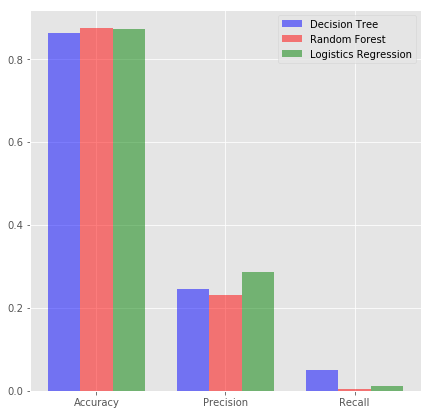

In [625]:
# Визуализируем

fig, ax = plt.subplots(figsize=(7, 7))
x = np.arange(0,results.shape[0],1)
width = 0.25
ax.bar(x, results['Decision Tree'].values, width, color='b', alpha = 0.5)
ax.bar(x + width, results['Random Forest'].values, width, color='r', alpha = 0.5)
ax.bar(x + 2*width, results['Logistics Regression'].values, width, color='g',alpha = 0.5)

ax.set_xticks(x + width)
ax.set_xticklabels(list(results.index))
ax.legend(list(results.columns))


In [ ]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc по каждой модели

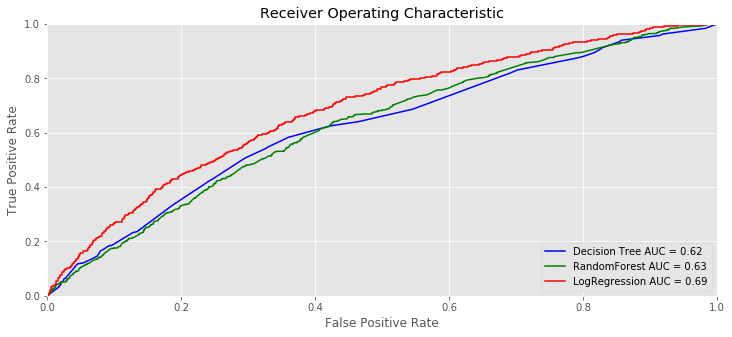

In [678]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

classifier = DecisionTreeClassifier(random_state=42, max_depth=9)
classifier.fit(X_train, y_train)
y_hat_proba = classifier.predict_proba(X_test)
preds = y_hat_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Decision Tree AUC = %0.2f' % roc_auc)
 
classifier = RandomForestClassifier(random_state=42, max_depth=9, n_estimators = 4 )
classifier.fit(X_train, y_train)
y_hat_proba = classifier.predict_proba(X_test)
preds = y_hat_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'RandomForest AUC = %0.2f' % roc_auc)           
           
    
classifier = LogisticRegression(penalty='l2', C=0.01, fit_intercept=True, class_weight = None, max_iter=100)
classifier.fit(X_log_train, y_train)
y_hat_proba = classifier.predict_proba(X_log_test)
preds = y_hat_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'LogRegression AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.show()

In [697]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
for train_idx, test_idx in cv.split(X, y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля выживших: обучение - {}, валидация - {}'.format(y[train_idx].mean(), y[test_idx].mean()))    
## Your Code Here

=== Очередной фолд ===
Обучение - 13699 объектов, валидация - 1523 объектов
Доля выживших: обучение - 0.11898678735674137, валидация - 0.11950098489822718
=== Очередной фолд ===
Обучение - 13699 объектов, валидация - 1523 объектов
Доля выживших: обучение - 0.11898678735674137, валидация - 0.11950098489822718
=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1522 объектов
Доля выживших: обучение - 0.11905109489051095, валидация - 0.11892247043363995
=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1522 объектов
Доля выживших: обучение - 0.11905109489051095, валидация - 0.11892247043363995
=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1522 объектов
Доля выживших: обучение - 0.11905109489051095, валидация - 0.11892247043363995
=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1522 объектов
Доля выживших: обучение - 0.11905109489051095, валидация - 0.11892247043363995
=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1522 объ

In [704]:
LogReg = LogisticRegression(penalty='l2', C=0.01, fit_intercept=True, class_weight = None, max_iter=100)
scaler = StandardScaler()
scaler.fit(X) # fit по всему объему значений X
X_log = scaler.transform(X)


Forest = RandomForestClassifier(random_state=42, max_depth=9, n_estimators = 4 )
Tree = DecisionTreeClassifier(random_state=42, max_depth=9)

In [707]:
# Посчитаем меру качества roc_auc на кросс-валидации для модели Forest
scores = cross_val_score(
    Forest,
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
)
print ("AUC scores AVG: \nRandom Forest:", scores.mean())
scores = cross_val_score(
    Tree,
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X, y)
)
print ("Decission Tree:", scores.mean())
scores = cross_val_score(
    LogReg,
    X,
    y,
    scoring='roc_auc',
    cv=cv.split(X_log, y)
)
print ("Logistic Regression:", scores.mean())

AUC scores AVG: 
Random Forest: 0.633552358831
Decission Tree: 0.615417123427
Logistic Regression: 0.640131895659


In [708]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
# Лучше всего себя показала Регрессия, ее и возьмем
classifier = LogisticRegression(penalty='l2', C=0.01, fit_intercept=True, class_weight = None, max_iter=100)
classifier.fit(X_log_train, y_train)

scaler = StandardScaler()
scaler.fit(X) # fit по всему объему значений X
X_T_scaled = scaler.transform(X_T)
y_hat_proba = classifier.predict_proba(X_T_scaled)

## Your Code Here

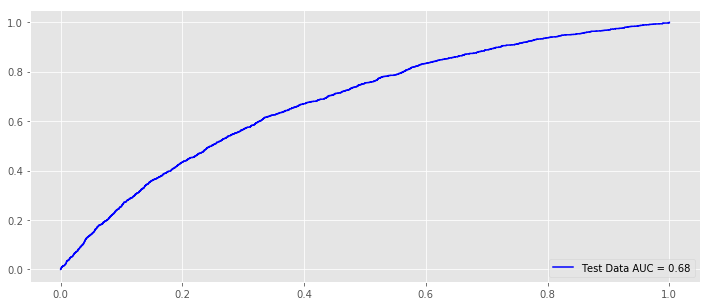

In [712]:
# Померить roc_auc на тесте
preds = y_hat_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_T, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Test Data AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()